# Exploratory Data Analysis (EDA) for Insurance Analytics

This notebook provides a complete exploratory data analysis of the insurance dataset, including data loading, cleaning, feature engineering, visualization, and statistical testing.

## 1. Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import sys
import os

# Add src directory to path for importing utilities
sys.path.append('../src')
from eda_utils import (
    plot_histogram, plot_boxplot, compute_claim_frequency, 
    compute_margin, segment_data, run_t_test, run_chi_squared_test
)

# Set display options
pd.set_option('display.max_columns', 50)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Data Loading and Initial Exploration

In [2]:
# Load the data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
display(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

/tmp/ipykernel_22114/327372349.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


Dataset shape: (1000098, 52)

Column names: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

First few rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,...,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,...,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,...,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,...,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,...,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,...,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

## 3. Feature Engineering

In [3]:
# Create key features for analysis
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
df['ClaimAmount'] = df['TotalClaims']
df = compute_margin(df)
df['ZipCode'] = df['PostalCode']

print("Feature engineering completed.")
print(f"New columns added: HasClaim, ClaimAmount, Margin, ZipCode")
print(f"\nDataset shape after feature engineering: {df.shape}")

Feature engineering completed.
New columns added: HasClaim, ClaimAmount, Margin, ZipCode

Dataset shape after feature engineering: (1000098, 56)


## 4. Key Performance Indicators (KPIs)

In [4]:
# Calculate overall KPIs
claim_frequency = compute_claim_frequency(df)
claim_severity = df[df['HasClaim'] == 1]['ClaimAmount'].mean()
avg_margin = df['Margin'].mean()
total_policies = len(df)

print("=== OVERALL KEY PERFORMANCE INDICATORS ===")
print(f"Total Policies: {total_policies:,}")
print(f"Claim Frequency: {claim_frequency:.4f} ({claim_frequency*100:.2f}%)")
print(f"Claim Severity: ${claim_severity:,.2f}")
print(f"Average Margin: ${avg_margin:.2f}")
print(f"Total Premium: ${df['TotalPremium'].sum():,.2f}")
print(f"Total Claims: ${df['TotalClaims'].sum():,.2f}")

=== OVERALL KEY PERFORMANCE INDICATORS ===
Total Policies: 1,000,098
Claim Frequency: 0.0028 (0.28%)
Claim Severity: $23,273.39
Average Margin: $-2.96
Total Premium: $61,911,562.70
Total Claims: $64,867,546.17


## 5. Descriptive Statistics

In [5]:
# Key numerical columns for analysis
key_columns = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'Margin']

print("=== DESCRIPTIVE STATISTICS ===")
display(df[key_columns].describe())

# Additional statistics
print("\n=== ADDITIONAL STATISTICS ===")
for col in key_columns:
    print(f"\n{col}:")
    print(f"  Skewness: {df[col].skew():.3f}")
    print(f"  Kurtosis: {df[col].kurtosis():.3f}")
    print(f"  Non-zero values: {(df[col] != 0).sum():,} ({(df[col] != 0).mean()*100:.1f}%)")

=== DESCRIPTIVE STATISTICS ===


,TotalPremium,TotalClaims,CustomValueEstimate,Margin
count,1.000098e+06,1.000098e+06,2.204560e+05,1.000098e+06
mean,6.190550e+01,6.486119e+01,2.255311e+05,-2.955694e+00
std,2.302845e+02,2.384075e+03,5.645157e+05,2.367137e+03
min,-7.825768e+02,-1.200241e+04,2.000000e+04,-3.928486e+05
25%,0.000000e+00,0.000000e+00,1.350000e+05,0.000000e+00
50%,2.178333e+00,0.000000e+00,2.200000e+05,2.157687e+00
75%,2.192982e+01,0.000000e+00,2.800000e+05,2.192982e+01
max,6.528260e+04,3.930921e+05,2.655000e+07,6.528260e+04



=== ADDITIONAL STATISTICS ===

TotalPremium:
  Skewness: 138.596
  Kurtosis: 37176.185
  Non-zero values: 618,464 (61.8%)

TotalClaims:
  Skewness: 69.933
  Kurtosis: 6791.926
  Non-zero values: 2,793 (0.3%)

CustomValueEstimate:
  Skewness: 40.871
  Kurtosis: 1762.322
  Non-zero values: 1,000,098 (100.0%)

Margin:
  Skewness: -69.999
  Kurtosis: 6869.503
  Non-zero values: 618,614 (61.9%)


## 6. Data Visualizations

=== DATA VISUALIZATIONS ===


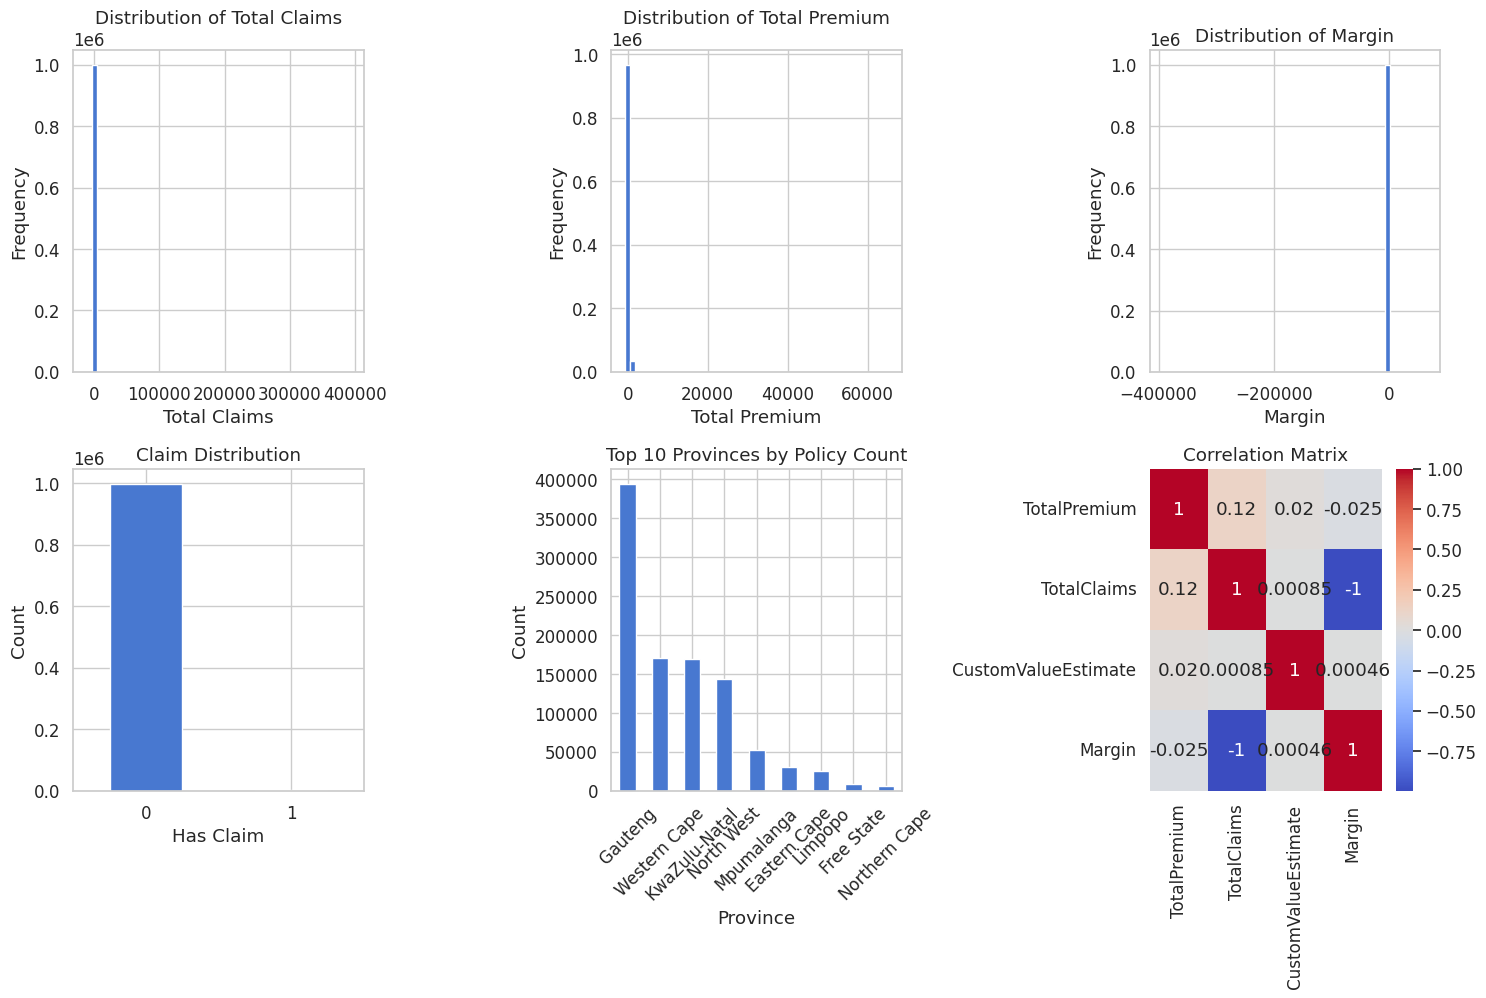

In [6]:
# Create visualizations using utility functions
print("=== DATA VISUALIZATIONS ===")

# Distribution plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['TotalClaims'].hist(bins=50)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
df['TotalPremium'].hist(bins=50)
plt.title('Distribution of Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
df['Margin'].hist(bins=50)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
df['HasClaim'].value_counts().plot(kind='bar')
plt.title('Claim Distribution')
plt.xlabel('Has Claim')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(2, 3, 5)
df['Province'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Provinces by Policy Count')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
# Correlation heatmap
corr_matrix = df[key_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

## 7. Segmentation Analysis

=== SEGMENTATION ANALYSIS ===

--- Analysis by Gender ---
                Count  ClaimFrequency  ClaimSeverity  AvgMargin  AvgPremium
Gender                                                                     
Not specified  940990          0.0028     23530.6677    -3.7315     62.9154
Male            42817          0.0022     14858.5523     4.2843     36.9046
Female           6755          0.0021     17874.7213     8.0288     45.0748


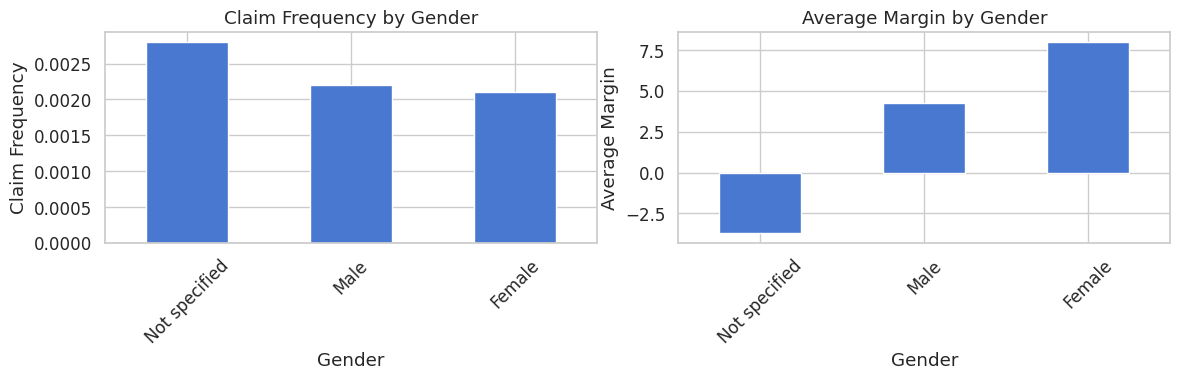


--- Analysis by Province ---
                Count  ClaimFrequency  ClaimSeverity  AvgMargin  AvgPremium
Province                                                                   
Gauteng        393865          0.0034     22243.8784   -13.5589     61.0711
Western Cape   170796          0.0022     28095.8499    -3.4147     57.4168
KwaZulu-Natal  169781          0.0028     29609.4875    -6.4336     77.8007
North West     143287          0.0024     16963.4670    10.9588     52.2763
Mpumalanga      52718          0.0024     15979.5534    15.0161     53.8012
Eastern Cape    30336          0.0016     27128.5333    25.8332     70.5467
Limpopo         24836          0.0027     15171.2942    20.9715     61.8990
Free State       8099          0.0014     32265.6611    20.5508     64.3738
Northern Cape    6380          0.0013     11186.3136    35.5905     49.6173


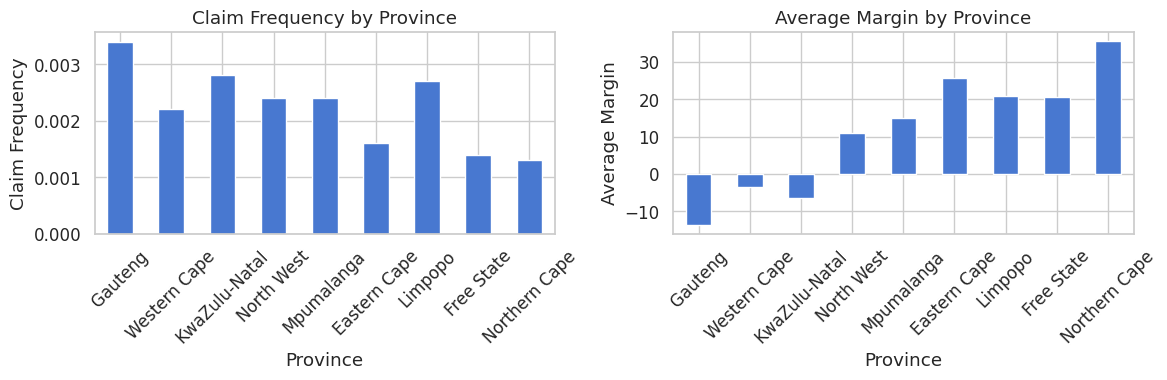


--- Analysis by VehicleType ---
                    Count  ClaimFrequency  ClaimSeverity  AvgMargin  \
VehicleType                                                           
Passenger Vehicle  933598          0.0028     22957.3740    -2.9242   
Medium Commercial   53985          0.0029     26075.1070    -3.6514   
Heavy Commercial     7401          0.0028     35736.8849   -39.1199   
Light Commercial     3897          0.0021      7556.5625    51.3331   
Bus                   665          0.0015      7996.5351    75.5612   

                   AvgPremium  
VehicleType                    
Passenger Vehicle     60.6707  
Medium Commercial     72.6636  
Heavy Commercial      62.2818  
Light Commercial      66.8457  
Bus                   87.5861  


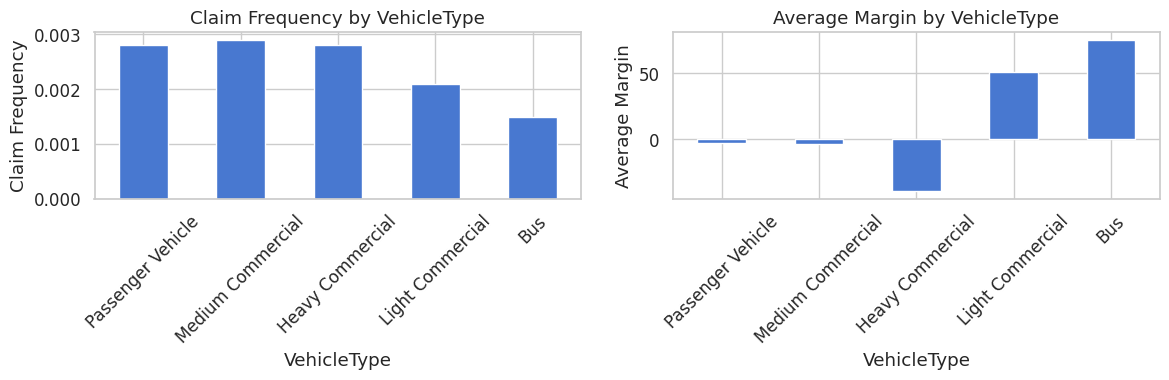

In [7]:
print("=== SEGMENTATION ANALYSIS ===")

# Analysis by key categorical variables
categorical_vars = ['Gender', 'Province', 'VehicleType']

for var in categorical_vars:
    if var in df.columns:
        print(f"\n--- Analysis by {var} ---")
        
        # Group analysis
        grouped = df.groupby(var).agg({
            'HasClaim': ['count', 'mean'],
            'ClaimAmount': lambda x: x[df.loc[x.index, 'HasClaim'] == 1].mean(),
            'Margin': 'mean',
            'TotalPremium': 'mean'
        }).round(4)
        
        grouped.columns = ['Count', 'ClaimFrequency', 'ClaimSeverity', 'AvgMargin', 'AvgPremium']
        grouped = grouped.sort_values('Count', ascending=False)
        
        print(grouped.head(10))
        
        # Visualization
        if len(grouped) <= 15:  # Only plot if reasonable number of categories
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 2, 1)
            grouped['ClaimFrequency'].plot(kind='bar')
            plt.title(f'Claim Frequency by {var}')
            plt.ylabel('Claim Frequency')
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2)
            grouped['AvgMargin'].plot(kind='bar')
            plt.title(f'Average Margin by {var}')
            plt.ylabel('Average Margin')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()

## 8. Statistical Testing

In [8]:
print("=== STATISTICAL TESTING ===")

# Test 1: Province vs Claim Frequency
if 'Province' in df.columns:
    contingency_prov = pd.crosstab(df['Province'], df['HasClaim'])
    chi2_prov, p_prov, dof_prov, expected_prov = run_chi_squared_test(contingency_prov)
    print(f"\nChi-squared test (Province vs Claim Frequency):")
    print(f"  Chi-squared statistic: {chi2_prov:.4f}")
    print(f"  p-value: {p_prov:.6f}")
    print(f"  Degrees of freedom: {dof_prov}")
    print(f"  Significant at α=0.05: {'Yes' if p_prov < 0.05 else 'No'}")

# Test 2: Gender vs Claim Frequency (if sufficient data)
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    if len(gender_counts) >= 2 and gender_counts.min() > 30:  # Ensure sufficient sample sizes
        contingency_gender = pd.crosstab(df['Gender'], df['HasClaim'])
        chi2_gender, p_gender, dof_gender, expected_gender = run_chi_squared_test(contingency_gender)
        print(f"\nChi-squared test (Gender vs Claim Frequency):")
        print(f"  Chi-squared statistic: {chi2_gender:.4f}")
        print(f"  p-value: {p_gender:.6f}")
        print(f"  Degrees of freedom: {dof_gender}")
        print(f"  Significant at α=0.05: {'Yes' if p_gender < 0.05 else 'No'}")

# Test 3: Margin comparison between top provinces
if 'Province' in df.columns:
    top_provinces = df['Province'].value_counts().head(2).index
    if len(top_provinces) == 2:
        prov1_data = df[df['Province'] == top_provinces[0]]['Margin']
        prov2_data = df[df['Province'] == top_provinces[1]]['Margin']
        
        t_stat, p_val = run_t_test(prov1_data, prov2_data)
        print(f"\nT-test (Margin comparison between {top_provinces[0]} and {top_provinces[1]}):")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_val:.6f}")
        print(f"  Significant at α=0.05: {'Yes' if p_val < 0.05 else 'No'}")
        print(f"  Mean margin {top_provinces[0]}: ${prov1_data.mean():.2f}")
        print(f"  Mean margin {top_provinces[1]}: ${prov2_data.mean():.2f}")

=== STATISTICAL TESTING ===

Chi-squared test (Province vs Claim Frequency):
  Chi-squared statistic: 104.1909
  p-value: 0.000000
  Degrees of freedom: 8
  Significant at α=0.05: Yes

Chi-squared test (Gender vs Claim Frequency):
  Chi-squared statistic: 7.2559
  p-value: 0.026570
  Degrees of freedom: 2
  Significant at α=0.05: Yes

T-test (Margin comparison between Gauteng and Western Cape):
  t-statistic: -1.3931
  p-value: 0.163596
  Significant at α=0.05: No
  Mean margin Gauteng: $-13.56
  Mean margin Western Cape: $-3.41


## 9. Risk Assessment by Geographic Regions

In [9]:
print("=== GEOGRAPHIC RISK ASSESSMENT ===")

# Top zip codes analysis
if 'ZipCode' in df.columns:
    zip_analysis = df.groupby('ZipCode').agg({
        'HasClaim': ['count', 'mean'],
        'ClaimAmount': lambda x: x[df.loc[x.index, 'HasClaim'] == 1].mean(),
        'Margin': 'mean'
    }).round(4)
    
    zip_analysis.columns = ['PolicyCount', 'ClaimFrequency', 'ClaimSeverity', 'AvgMargin']
    zip_analysis = zip_analysis[zip_analysis['PolicyCount'] >= 100]  # Filter for statistical significance
    zip_analysis = zip_analysis.sort_values('PolicyCount', ascending=False)
    
    print("\nTop 10 Zip Codes by Policy Count (minimum 100 policies):")
    print(zip_analysis.head(10))
    
    # Identify high-risk zip codes
    high_risk_threshold = zip_analysis['ClaimFrequency'].quantile(0.8)
    high_risk_zips = zip_analysis[zip_analysis['ClaimFrequency'] >= high_risk_threshold]
    
    print(f"\nHigh-risk zip codes (claim frequency >= {high_risk_threshold:.4f}):")
    print(high_risk_zips.sort_values('ClaimFrequency', ascending=False))

=== GEOGRAPHIC RISK ASSESSMENT ===

Top 10 Zip Codes by Policy Count (minimum 100 policies):
         PolicyCount  ClaimFrequency  ClaimSeverity  AvgMargin
ZipCode                                                       
2000          133498          0.0036     19196.4137    -8.1119
122            49171          0.0043     18162.0259   -22.8598
7784           28585          0.0017     35156.6537   -13.4712
299            25546          0.0026     13622.7456    19.5594
7405           18518          0.0016     21002.0227    17.5168
458            13775          0.0023     20160.2732     4.5461
8000           11794          0.0043     33685.3300   -16.0364
2196           11048          0.0029     50877.7780   -21.3411
470            10226          0.0043     12946.8332     3.0691
7100           10161          0.0028     21165.1582     6.7981

High-risk zip codes (claim frequency >= 0.0042):
         PolicyCount  ClaimFrequency  ClaimSeverity  AvgMargin
ZipCode                               

## 10. Data Quality Assessment

In [10]:
print("=== DATA QUALITY ASSESSMENT ===")

# Missing values analysis
missing_analysis = df.isnull().sum()
missing_analysis = missing_analysis[missing_analysis > 0].sort_values(ascending=False)

print("\nColumns with missing values:")
for col, count in missing_analysis.items():
    percentage = (count / len(df)) * 100
    print(f"  {col}: {count:,} ({percentage:.2f}%)")

# Data type consistency
print("\nData type summary:")
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"  {dtype}: {count} columns")

# Outlier detection for key numerical columns
print("\nOutlier detection (values beyond 3 standard deviations):")
for col in ['TotalPremium', 'TotalClaims', 'Margin']:
    if col in df.columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        outliers = df[(df[col] < mean_val - 3*std_val) | (df[col] > mean_val + 3*std_val)]
        print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

=== DATA QUALITY ASSESSMENT ===

Columns with missing values:
  NumberOfVehiclesInFleet: 1,000,098 (100.00%)
  CrossBorder: 999,400 (99.93%)
  CustomValueEstimate: 779,642 (77.96%)
  WrittenOff: 641,901 (64.18%)
  Converted: 641,901 (64.18%)
  Rebuilt: 641,901 (64.18%)
  NewVehicle: 153,295 (15.33%)
  Bank: 145,961 (14.59%)
  AccountType: 40,232 (4.02%)
  Gender: 9,536 (0.95%)
  MaritalStatus: 8,259 (0.83%)
  mmcode: 552 (0.06%)
  VehicleType: 552 (0.06%)
  make: 552 (0.06%)
  VehicleIntroDate: 552 (0.06%)
  NumberOfDoors: 552 (0.06%)
  bodytype: 552 (0.06%)
  kilowatts: 552 (0.06%)
  cubiccapacity: 552 (0.06%)
  Cylinders: 552 (0.06%)
  Model: 552 (0.06%)
  CapitalOutstanding: 2 (0.00%)

Data type summary:
  object: 36 columns
  float64: 13 columns
  int64: 6 columns
  bool: 1 columns

Outlier detection (values beyond 3 standard deviations):
  TotalPremium: 12470 outliers (1.25%)
  TotalClaims: 1312 outliers (0.13%)
  Margin: 1310 outliers (0.13%)


## 11. Summary and Recommendations

In [11]:
print("=== SUMMARY AND RECOMMENDATIONS ===")

print("\n1. KEY FINDINGS:")
print(f"   • Dataset contains {len(df):,} insurance policies")
print(f"   • Overall claim frequency: {claim_frequency*100:.2f}%")
print(f"   • Average claim severity: ${claim_severity:,.2f}")
print(f"   • Average margin per policy: ${avg_margin:.2f}")

print("\n2. DATA QUALITY:")
missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"   • Overall missing data: {missing_pct:.2f}%")
print(f"   • Columns with significant missing data: {len(missing_analysis)} out of {len(df.columns)}")

print("\n3. RECOMMENDATIONS FOR MODELING:")
print("   • Handle missing values in key columns before modeling")
print("   • Consider geographic segmentation for risk assessment")
print("   • Investigate high-risk segments for targeted interventions")
print("   • Use statistical test results to validate feature importance")
print("   • Consider outlier treatment for premium and claims data")

print("\n4. NEXT STEPS:")
print("   • Proceed to machine learning modeling notebook")
print("   • Implement feature engineering based on EDA insights")
print("   • Build predictive models for claim frequency and severity")
print("   • Validate model performance using appropriate metrics")

=== SUMMARY AND RECOMMENDATIONS ===

1. KEY FINDINGS:
   • Dataset contains 1,000,098 insurance policies
   • Overall claim frequency: 0.28%
   • Average claim severity: $23,273.39
   • Average margin per policy: $-2.96

2. DATA QUALITY:
   • Overall missing data: 9.05%
   • Columns with significant missing data: 22 out of 56

3. RECOMMENDATIONS FOR MODELING:
   • Handle missing values in key columns before modeling
   • Consider geographic segmentation for risk assessment
   • Investigate high-risk segments for targeted interventions
   • Use statistical test results to validate feature importance
   • Consider outlier treatment for premium and claims data

4. NEXT STEPS:
   • Proceed to machine learning modeling notebook
   • Implement feature engineering based on EDA insights
   • Build predictive models for claim frequency and severity
   • Validate model performance using appropriate metrics
